
Question 2 - CNN Autoencoder for Image Reconstruction
Objective:
Develop and evaluate a Convolutional Neural Network (CNN) Autoencoder to reconstruct images
from a given dataset.

Loading the dataset

In [ ]:
import zipfile
import os

# Path to uploaded ZIP file
uploaded_zip_path = '/content/COIL datasey.zip'
extraction_path = '/content/coil-20/coil-20-proc/coil-20/coil-20-proc'

# Extract the ZIP file
with zipfile.ZipFile(uploaded_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Check extracted contents
extracted_files = os.listdir(extraction_path)
print(f"Extracted {len(extracted_files)} files.")

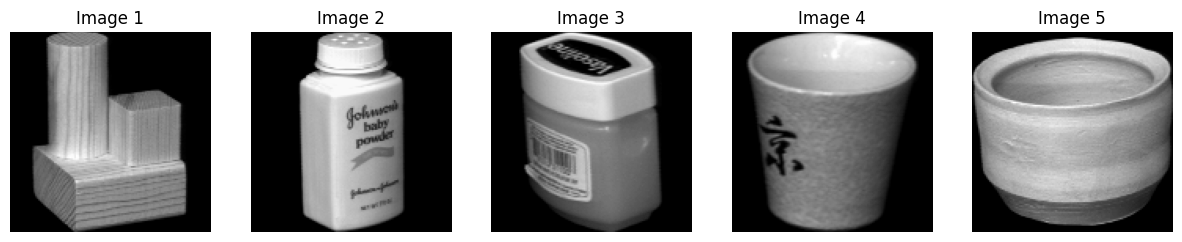

In [19]:
import cv2
import matplotlib.pyplot as plt
import os

# Directory where images are extracted
image_dir = '/content/coil-20/coil-20-proc/coil-20/coil-20-proc'

# Get a list of image file names
image_files = [file for file in os.listdir(image_dir) if file.endswith(('.png', '.jpg', '.jpeg'))]

# Display the first 5 images
plt.figure(figsize=(15, 10))
for i, image_file in enumerate(image_files[:5]):  # Display only 5 images
    img_path = os.path.join(image_dir, image_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image as grayscale

    plt.subplot(1, 5, i + 1)  # Create a subplot for each image
    plt.imshow(img, cmap='gray')
    plt.title(f"Image {i + 1}")
    plt.axis('off')

plt.show()


Preprocess the Data

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load images into an array
image_data = []
for image_file in image_files:
    img_path = os.path.join(image_dir, image_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
    image_data.append(img / 255.0)  # Normalize pixel values to [0, 1]

image_data = np.array(image_data)  # Convert to numpy array

# Add a channel dimension (for grayscale images, channel=1)
image_data = np.expand_dims(image_data, axis=-1)

# Split the data into training (80%) and testing (20%) sets
train_data, test_data = train_test_split(image_data, test_size=0.2, random_state=42)

print(f"Train data shape: {train_data.shape}, Test data shape: {test_data.shape}")


Train data shape: (1152, 128, 128, 1), Test data shape: (288, 128, 128, 1)


Define the CNN Autoencoder

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, ReLU
from tensorflow.keras.optimizers import Adam

# Define the CNN Autoencoder
# Encoder
input_img = Input(shape=(128, 128, 1))  # Replace 128 with your image size if different
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
latent = Conv2D(256, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2DTranspose(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(latent)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Combine Encoder and Decoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Print model summary
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 64, 64, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 1)         │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 757,249 (2.89 MB)

 Trainable params: 757,249 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

Train the Autoencoder

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - loss: 0.1036 - val_loss: 0.0120
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0087 - val_loss: 0.0037
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0012 - val_loss: 9.7802e-04
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 9.9968e-04 - val_loss: 8.8557e-04
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/st

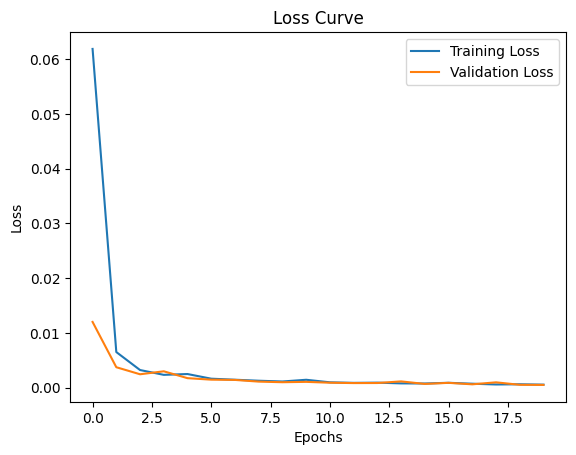

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the autoencoder
history = autoencoder.fit(
    train_data, train_data,  # Input and output are the same for autoencoders
    epochs=20,
    batch_size=32,
    validation_data=(test_data, test_data),
    callbacks=[early_stopping]
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()


Evaluate the Autoencoder

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


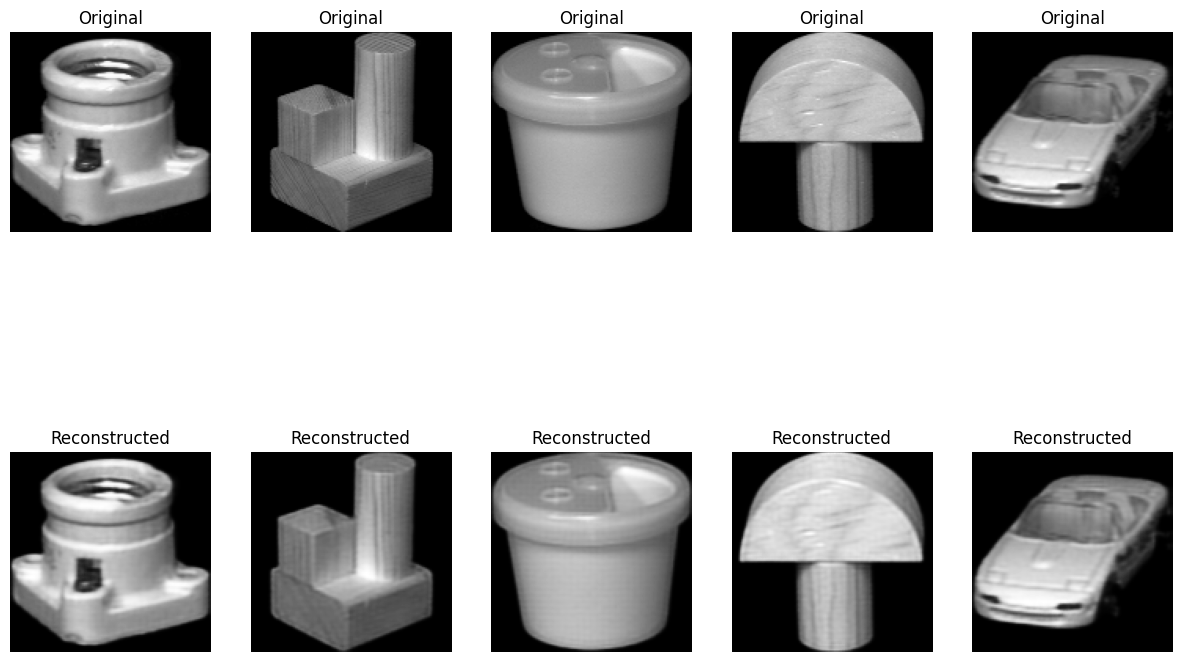

In [23]:
# Predict reconstructed images on test data
reconstructed = autoencoder.predict(test_data)

# Visualize original and reconstructed images
plt.figure(figsize=(15, 10))
for i in range(5):  # Display 5 examples
    # Original images
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_data[i].squeeze(), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Reconstructed images
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed[i].squeeze(), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()


Calculate the Mean Squared Error

In [24]:
from sklearn.metrics import mean_squared_error

# Flatten the test data and reconstructed data
test_mse = mean_squared_error(test_data.flatten(), reconstructed.flatten())
print(f"Test MSE: {test_mse}")


Test MSE: 0.0004835523308253047


The Mse of 0.00048 suggest that the error is very less

Autoencoder Architecture

In [25]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 64, 64, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 1)         │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,271,749 (8.67 MB)

 Trainable params: 757,249 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,514,500 (5.78 MB)